# Séance 3 - *correction*

## Données `WGI`

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
wgi = pandas.read_csv("https://fxjollois.github.io/donnees/WGI/wgi2019.csv")
wgi.head(10)

,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,Aruba,ABW,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
1,Andorra,ADO,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
2,Afghanistan,AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
3,Angola,AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
4,Anguilla,AIA,NaN,1.367357,0.815824,0.846231,0.355737,1.234392
5,Albania,ALB,0.151805,0.118570,-0.061331,0.274380,-0.411179,-0.528758
6,Netherlands Antilles (former),ANT,NaN,NaN,NaN,NaN,NaN,NaN
7,United Arab Emirates,ARE,-1.122036,0.703494,1.377221,0.979325,0.840219,1.106342
8,Argentina,ARG,0.600435,-0.119978,-0.086486,-0.492753,-0.430726,-0.071071
9,Armenia,ARM,0.050043,-0.506411,-0.066817,0.249515,-0.131276,-0.184168


## Description des données

In [3]:
wgi.describe().round(2)

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
count,204.00,211.00,209.00,209.00,209.00,209.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.19,-2.77,-2.45,-2.40,-2.35,-1.77
25%,-0.79,-0.55,-0.68,-0.69,-0.72,-0.76
50%,0.09,0.07,-0.07,-0.11,-0.12,-0.18
75%,0.90,0.84,0.71,0.85,0.69,0.70
max,1.69,1.90,2.22,2.16,2.02,2.17


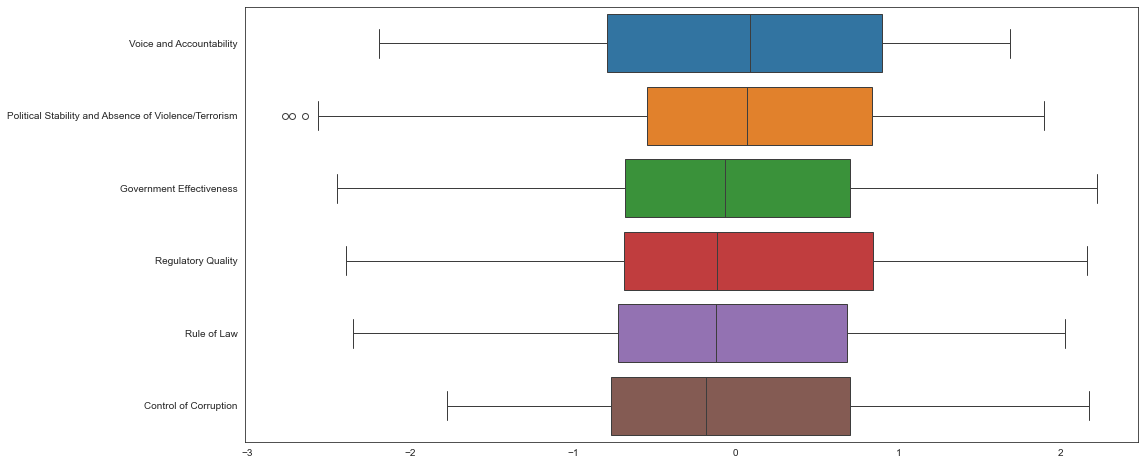

In [4]:
plt.figure(figsize = (16, 8))
seaborn.boxplot(data = wgi, orient = "h")
plt.show()

## ACP sur les données

In [5]:
wgi.isna().sum()

Country                                                   0
Code                                                      0
Voice and Accountability                                 10
Political Stability and Absence of Violence/Terrorism     3
Government Effectiveness                                  5
Regulatory Quality                                        5
Rule of Law                                               5
Control of Corruption                                     5
dtype: int64

In [6]:
wgi_complet = wgi[~wgi.isna().any(axis = 1)].reset_index()
wgi_complet.head(10)

,index,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,0,Aruba,ABW,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
1,1,Andorra,ADO,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
2,2,Afghanistan,AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
3,3,Angola,AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
4,5,Albania,ALB,0.151805,0.118570,-0.061331,0.274380,-0.411179,-0.528758
5,7,United Arab Emirates,ARE,-1.122036,0.703494,1.377221,0.979325,0.840219,1.106342
6,8,Argentina,ARG,0.600435,-0.119978,-0.086486,-0.492753,-0.430726,-0.071071
7,9,Armenia,ARM,0.050043,-0.506411,-0.066817,0.249515,-0.131276,-0.184168
8,11,Antigua and Barbuda,ATG,0.760444,0.959709,-0.003870,0.485375,0.405205,0.277898
9,12,Australia,AUS,1.315125,1.086503,1.571896,1.873539,1.734145,1.811107


In [7]:
wgi_num = wgi_complet[wgi.columns[2:]]
wgi_num

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
1,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
2,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
3,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
4,0.151805,0.118570,-0.061331,0.274380,-0.411179,-0.528758
...,...,...,...,...,...,...
197,0.026626,-0.091665,0.019079,0.113867,-0.119070,-0.445551
198,0.670388,-0.217931,0.367380,0.156172,-0.076408,0.084924
199,-1.365966,-1.808007,-1.627429,-1.509667,-1.786088,-1.538931
200,-0.286199,-0.102216,-0.675215,-0.554269,-0.462069,-0.640345


In [8]:
pca = PCA(n_components = 6)
pca.fit(wgi_num)

PCA(n_components=6)

In [9]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,5.049592,84.0,84.0
1,Dim2,0.414679,7.0,91.0
2,Dim3,0.307597,5.0,96.0
3,Dim4,0.121650,2.0,98.0
4,Dim5,0.049650,1.0,99.0
5,Dim6,0.040692,1.0,100.0


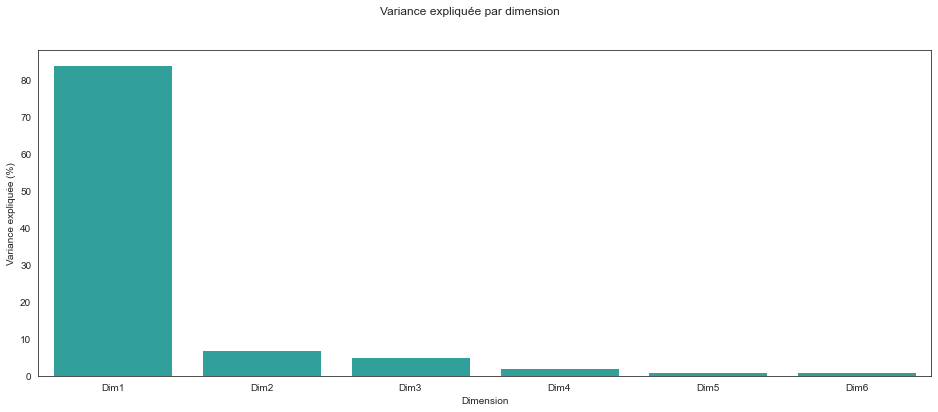

In [10]:
plt.figure(figsize=(16, 6))
g_eig = seaborn.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        color = "lightseagreen",
                        data = eig)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

In [11]:
wgi_proj = pandas.DataFrame(pca.transform(wgi_num)).rename(columns = {i: "Dim"+str(i+1) for i in range(6)}) \
    .assign(Pays = wgi_complet.Country)
wgi_proj

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Pays
0,-2.921523,0.503627,0.056127,0.152636,0.031572,0.082826,Aruba
1,-3.630601,0.075195,0.445399,-0.165326,-0.194070,0.416103,Andorra
2,3.704414,-0.846353,-1.093568,0.134714,-0.123744,-0.112983,Afghanistan
3,2.083839,0.446336,0.242998,-0.215133,0.050528,-0.154599,Angola
4,0.137824,0.175896,-0.119501,-0.649779,-0.141887,-0.141638,Albania
...,...,...,...,...,...,...,...
197,0.134034,-0.035217,-0.094282,-0.400461,0.001850,0.095660,Serbia
198,-0.469483,-0.010186,-0.579558,-0.067936,-0.351600,0.124790,South Africa
199,3.856331,-0.236763,-0.284979,0.079236,-0.088370,-0.093258,"Congo, Dem. Rep."
200,1.060152,0.400094,0.080514,-0.119279,0.132326,0.005206,Zambia


In [12]:
coordvar = pca.components_.T * numpy.sqrt(pca.explained_variance_)
coordvar_df = pandas.DataFrame(coordvar, columns=['Dim'+str(i) for i in range(1, 7)], index=wgi_num.columns)

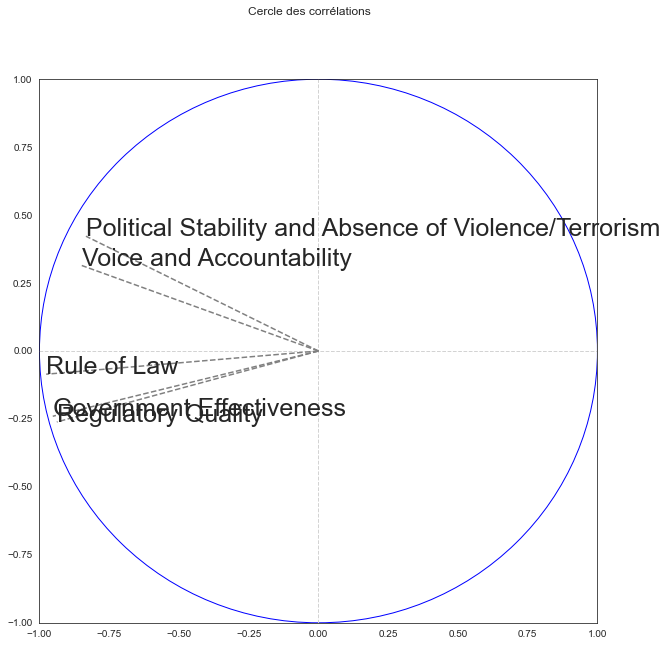

In [13]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(5):
    axes.text(coordvar_df["Dim1"].iloc[j],
              coordvar_df["Dim2"].iloc[j], 
              coordvar_df.index[j], size = 25)
    axes.plot([0,coordvar_df["Dim1"].iloc[j]], 
              [0,coordvar_df["Dim2"].iloc[j]], 
              color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

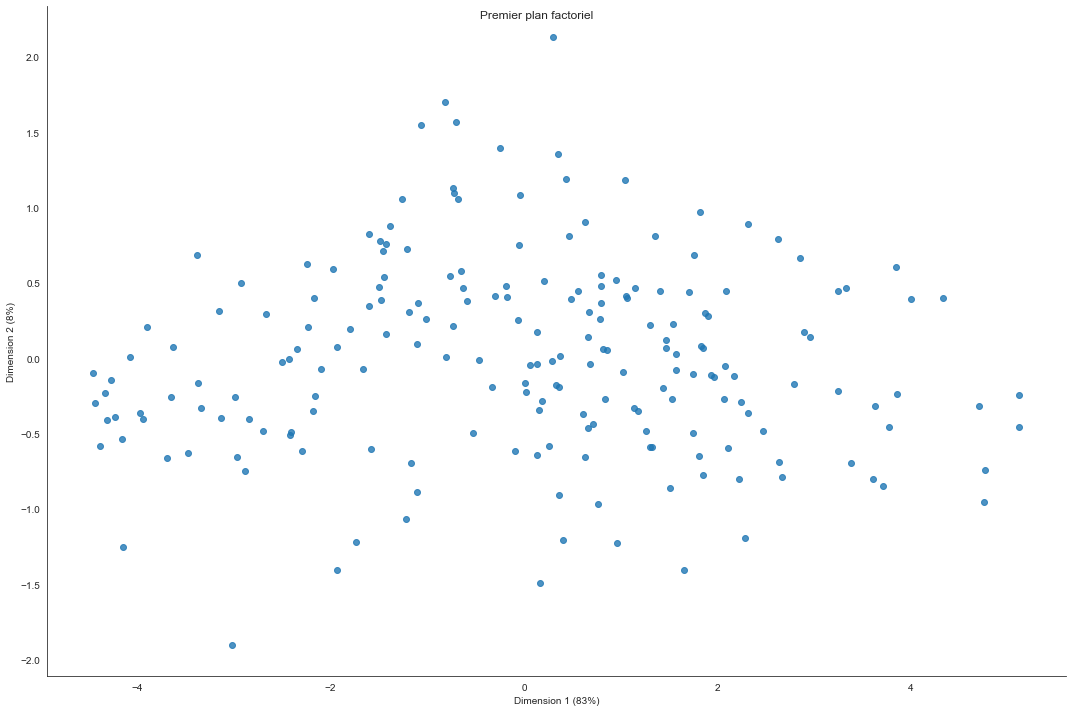

In [14]:
g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", data = wgi_proj, fit_reg = False, 
                       height = 10, aspect = 1.5)
g_pca.set(xlabel = "Dimension 1 (83%)", ylabel = "Dimension 2 (8%)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

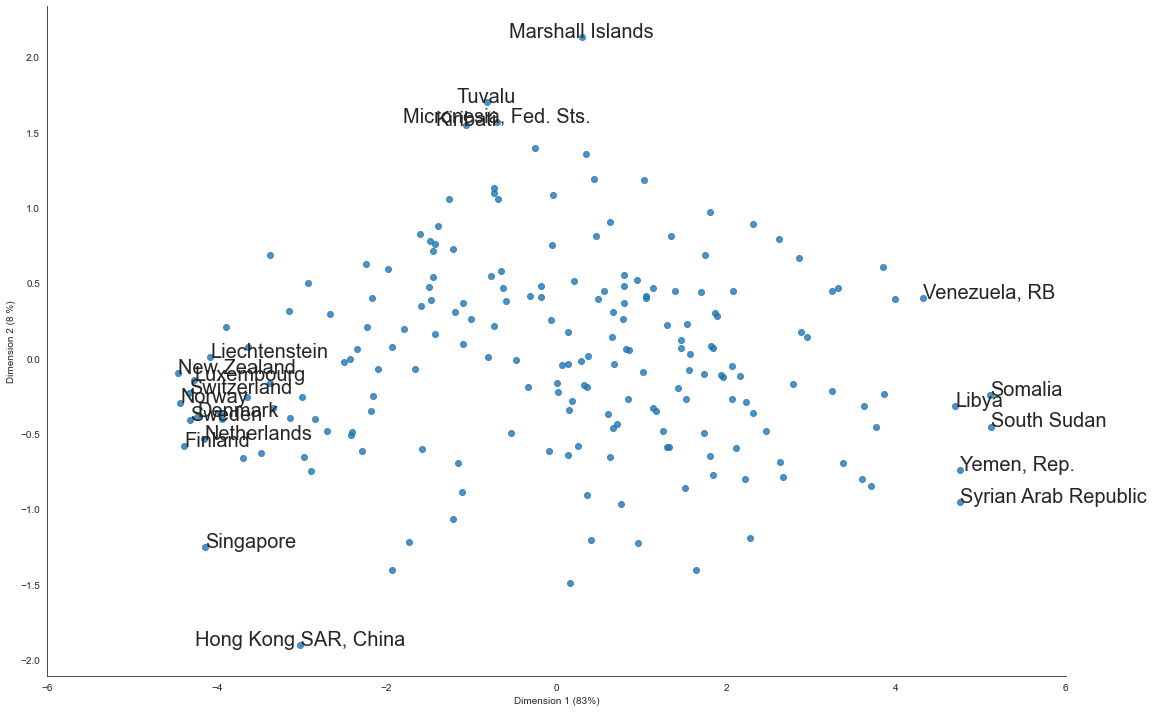

In [15]:
g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", data = wgi_proj, fit_reg = False, 
                       height = 10, aspect = 1.5)
g_pca.set(xlabel = "Dimension 1 (83%)", ylabel = "Dimension 2 (8 %)")
plt.xlim(-6, 6)

for i in range(wgi_proj.shape[0]):
    if (abs(wgi_proj.iloc[i,0]) > 4):
        plt.text(wgi_proj.iloc[i,0], wgi_proj.iloc[i,1], wgi_proj.iloc[i,6], ha = "left", fontsize = 20)
    if (abs(wgi_proj.iloc[i,1]) > 1.5):
        plt.text(wgi_proj.iloc[i,0], wgi_proj.iloc[i,1], wgi_proj.iloc[i,6], ha = "center", fontsize = 20)

plt.show()